In [24]:
import folium
import base64
import matplotlib.pyplot as plt
from scipy import ndimage
from folium import IFrame
import pandas as pd
from folium.plugins import Search
import datetime
import json
import geopandas
#https://geopandas.org/gallery/create_geopandas_from_pandas.html
#https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/plugin-Search.ipynb

* Todo

* 1. Date로 Filtering
* 2. Date로 검색
* 3. Keyword로 Filtering
* 4. Keyword로 검색

https://stackoverflow.com/questions/57468332/folium-search-plugin-no-results-for-featuregroup

https://stackoverflow.com/questions/55312766/folium-make-geojson-search-marker-transparent

In [25]:
df = pd.read_excel('./data/유연노윤데이트.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date.astype(str)
df['Keyword'] = df['Keyword'].fillna('')

In [26]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Lon, df.Lat), crs={'init': 'epsg:4326'})

In [27]:
m = folium.Map(location=[37.5139598,127.1069059], zoom_start=5)

In [28]:
def to_compatibility(ix = 0):
    imgs = [plt.imread('./data/'+x) for x in df.loc[ix, 'Image'].split(';')]
    if len(imgs)==3:
        fig = plt.figure()
        a = fig.add_subplot(1, 3, 1)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[0], 270))
        b = fig.add_subplot(1, 3, 2)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[1], 270))
        c = fig.add_subplot(1, 3, 3)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[2], 270))
        fig.savefig('%s.png'%ix)

    elif len(imgs)==3:
        fig = plt.figure()
        a = fig.add_subplot(1, 2, 1)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[0], 270))
        b = fig.add_subplot(1, 2, 2)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[1], 270))
        fig.savefig('%s.png'%ix)

    elif len(imgs)==1:
        fig = plt.figure()
        a = fig.add_subplot(1, 1, 1)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[0], 270))
        fig.savefig('%s.png'%ix)

def to_map(encoded, lat, lon, date='2020-03-16'):
    resolution, width, height = 75, 7, 3
    html = '<img src="data:image/png;base64,{}">'.format
    iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution)+20)
    popup = folium.Popup(iframe, max_width=2650)

    icon = folium.Icon(color="red", icon="ok")
    marker = folium.Marker(location=[lat,lon], popup=popup, icon=icon,
                  tooltip=date)
    x = marker.add_to(m)

In [29]:
df

,Date,Lat,Lon,Image,Keyword,geometry
0,2020-03-15,37.574427,126.983337,0.jpg,,POINT (126.9833369 37.5744271)
1,2020-03-15,37.554370,127.109021,1.jpg,,POINT (127.1090209 37.55437)
2,2020-03-16,37.509747,127.100830,2.jpg,,POINT (127.1008297 37.5097473)
3,2020-03-16,37.513265,127.097945,3.jpg,,POINT (127.0979449 37.5132654)


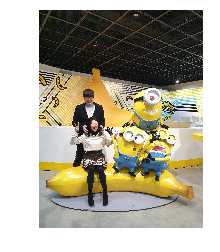

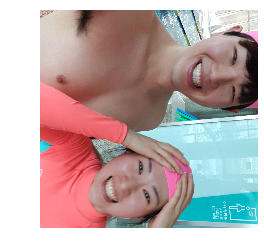

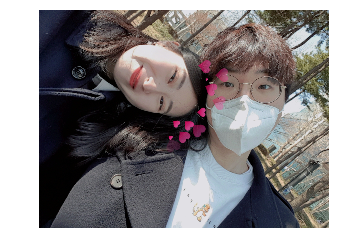

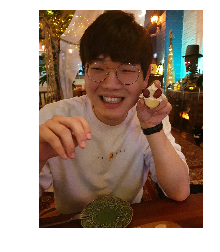

In [30]:
for ix in list(df.index):
    to_compatibility(ix)
    encoded = base64.b64encode(open('%s.png'%ix, 'rb').read()).decode()
    to_map(encoded, df.loc[ix, 'Lat'], df.loc[ix, 'Lon'], str(df.loc[ix, 'Date'])+' '+df.loc[ix, 'Keyword'])

In [31]:
dategeo = folium.GeoJson(
    gdf.to_crs(epsg='4326'),
    name='Date',
    tooltip=folium.GeoJsonTooltip(
        fields=['Date'],
        aliases=['Date'], 
        localize=False
    )
).add_to(m)

datesearch = Search(
    layer=dategeo,
    geom_type='Point',
    placeholder='Search for a Date',
    collapsed=True,
    search_label='Date',
    weight=3, position='topleft'
).add_to(m)

In [32]:
keywordgeo = folium.GeoJson(
    gdf,
    name='Keyword',
    tooltip=folium.GeoJsonTooltip(
        fields=['Keyword'],
        aliases=['Keyword'], 
        localize=False
    )
).add_to(m)

datesearch = Search(
    layer=dategeo,
    geom_type='Point',
    placeholder='Search for a Keyword',
    collapsed=True,
    search_label='Keyword',
    weight=3, position='topright'
).add_to(m)

In [33]:
folium.LayerControl().add_to(m)

In [34]:
m

In [35]:
m.save('version_%s.html'%str(datetime.datetime.now().date()).replace('-',''))